<a href="https://colab.research.google.com/github/hegdenishit84/MachineLearning/blob/master/Black_Friday_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/hegdenishit84/MachineLearning/master/train.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [0]:
#convert Gender 
df['Gender'] = df['Gender'].map({'M':0, 'F':1})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


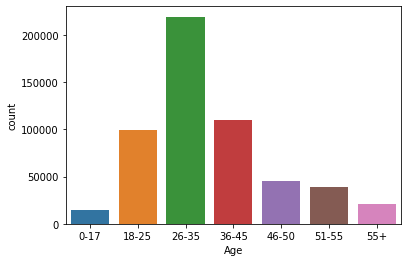

In [7]:
sns.countplot(x='Age', data=df,order=sorted(df['Age'].unique()))

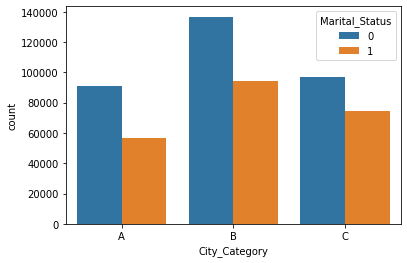

In [8]:
sns.countplot(x='City_Category', data=df, hue='Marital_Status',order=sorted(df['City_Category'].unique()))

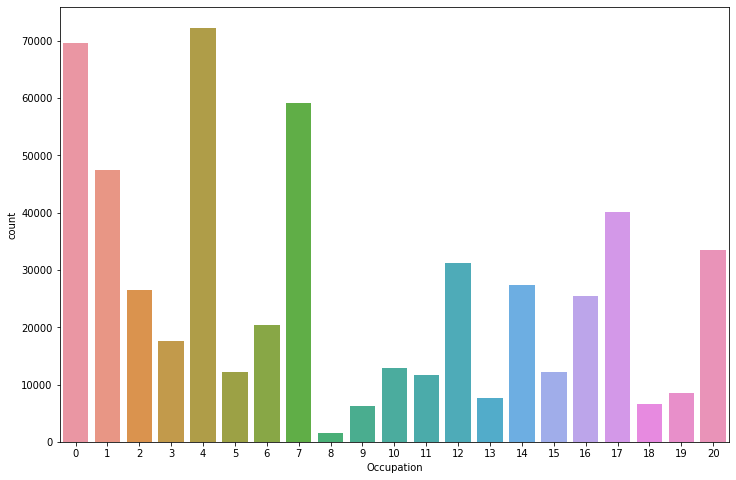

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x='Occupation', data=df,order=sorted(df['Occupation'].unique()))

In [10]:
df[df['Product_Category_1'] == 20].head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
545915,1000001,P00375436,1,0-17,10,A,2,0,20,NaN,NaN,612
545916,1000002,P00372445,0,55+,16,C,4+,0,20,NaN,NaN,119


In [11]:
df['Product_Category_2'].isnull().groupby(df['Product_Category_1']).mean() * 100

Product_Category_1
1       4.700167
2       3.897083
3       1.182407
4       1.216711
5      42.204157
6       4.851950
7      91.937651
8      53.333333
9       0.243902
10      8.897561
11     50.936715
12     45.021535
13     11.281312
14     72.422850
15     45.087440
16    100.000000
17    100.000000
18    100.000000
19    100.000000
20    100.000000
Name: Product_Category_2, dtype: float64

In [12]:
df['Product_Category_3'].isnull().groupby(df['Product_Category_1']).mean() *100

Product_Category_1
1      35.073872
2      31.658565
3      38.346609
4      54.488216
5      87.404345
6      58.966090
7     100.000000
8      92.040377
9     100.000000
10     65.756098
11     91.925722
12     95.971624
13     80.969544
14    100.000000
15     97.599364
16    100.000000
17    100.000000
18    100.000000
19    100.000000
20    100.000000
Name: Product_Category_3, dtype: float64

In [13]:
print(sorted(df['Age'].unique()))
print(sorted(df['Stay_In_Current_City_Years'].unique()))
print(sorted(df['City_Category'].unique()))
print(sorted(df['Occupation'].unique()))

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
['0', '1', '2', '3', '4+']
['A', 'B', 'C']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [14]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

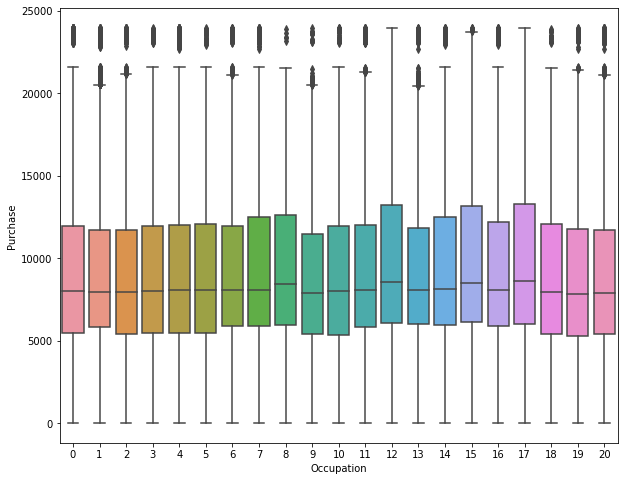

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Occupation", y="Purchase", data=df,)

In [0]:
modified_df = pd.get_dummies(df,drop_first=True,columns=['Age','Stay_In_Current_City_Years','City_Category','Occupation'])


In [17]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Product_ID                     550068 non-null  object 
 2   Gender                         550068 non-null  int64  
 3   Marital_Status                 550068 non-null  int64  
 4   Product_Category_1             550068 non-null  int64  
 5   Product_Category_2             376430 non-null  float64
 6   Product_Category_3             166821 non-null  float64
 7   Purchase                       550068 non-null  int64  
 8   Age_18-25                      550068 non-null  uint8  
 9   Age_26-35                      550068 non-null  uint8  
 10  Age_36-45                      550068 non-null  uint8  
 11  Age_46-50                      550068 non-null  uint8  
 12  Age_51-55                     

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB


In [0]:
def remove_prefix(product_id):
    if(product_id.startswith("P00")):
        return product_id[3:]
    

modified_df['Product_ID'] = modified_df['Product_ID'].apply(lambda x : remove_prefix(x))

In [0]:
modified_df['Product_ID'] = pd.to_numeric(modified_df['Product_ID'])

In [21]:
modified_df['Product_ID'].nunique()

3631

In [0]:
modified_df = modified_df.drop(['Product_Category_2', 'Product_Category_3'], axis=1)

In [23]:
modified_df.corr()['Purchase']

User_ID                          0.004716
Product_ID                      -0.103961
Gender                          -0.060346
Marital_Status                  -0.000463
Product_Category_1              -0.343703
Purchase                         1.000000
Age_18-25                       -0.008831
Age_26-35                       -0.001830
Age_36-45                        0.006707
Age_46-50                       -0.003317
Age_51-55                        0.014792
Age_55+                          0.002904
Stay_In_Current_City_Years_1    -0.002030
Stay_In_Current_City_Years_2     0.005358
Stay_In_Current_City_Years_3     0.002090
Stay_In_Current_City_Years_4+    0.000988
City_Category_B                 -0.019098
City_Category_C                  0.061012
Occupation_1                    -0.019005
Occupation_2                    -0.013975
Occupation_3                    -0.003095
Occupation_4                    -0.003872
Occupation_5                     0.002072
Occupation_6                    -0

In [0]:
#%% Prepare Data
from sklearn.model_selection import train_test_split

# Split-out validation dataset
X = modified_df.drop('Purchase',axis=1).values
y = modified_df['Purchase'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#%% Spot Check Algorithms
#models = []
#models.append(('LR', LinearRegression()))
#models.append(('LASSO', Lasso()))
#models.append(('EN', ElasticNet()))

In [0]:
#%% evaluate each model in turn
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
#from math import sqrt

#results = []
#names = []
#for name, model in models:
#    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
#    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, \
#                                 scoring='neg_mean_squared_error') 
#    results.append(cv_results)
#    names.append(name)
#    
#    rmse = np.sqrt(cv_results.mean()*-1)
#    msg = "%s: %f (%f)" % (name, rmse, cv_results.std())
#    print(msg)
#     print(sorted(cv_results, reverse=True))

In [0]:
#ensembles = []
#ensembles.append(('AB', AdaBoostRegressor()))
#ensembles.append(('GBM', GradientBoostingRegressor()))
#ensembles.append(('RF', RandomForestRegressor()))
#ensembles.append(('ET', ExtraTreesRegressor()))
#results = []
#names = []
#for name, model in ensembles:
#    kfold = KFold(n_splits=5, shuffle=True, random_state=5)
#    cv_results = cross_val_score(model, X_train, Y_train,cv=kfold, scoring='neg_mean_squared_error')
#    results.append(cv_results)
#    names.append(name)
#    rmse = np.sqrt(cv_results.mean()*-1)
#    msg = "%s: %f (%f)" % (name, rmse, cv_results.std())
#    print(msg)




In [0]:
#%% Tune scaled GBM
#param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400,500,600,700,800]))
                                            
#model = GradientBoostingRegressor(random_state=5)
#kfold = KFold(n_splits=5, shuffle=True, random_state=5)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
#grid_result = grid.fit(X_train, Y_train)

#print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))

#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

In [30]:
model = GradientBoostingRegressor(random_state=5, n_estimators=800)
model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
predictions = model.predict(X_train)
print(mean_squared_error(Y_train, predictions))
root_mean_squared_error = np.sqrt(mean_squared_error(Y_train, predictions))
print(root_mean_squared_error)

7467563.787139275
2732.6843555630926


In [34]:
# transform the validation dataset
#rescaledX_test = scaler.fit_transform(X_test)
predictions = model.predict(X_test)
print(mean_squared_error(Y_test, predictions))

root_mean_squared_error = np.sqrt(mean_squared_error(Y_test, predictions))
print(root_mean_squared_error)

7578402.02672101
2752.8897592749713
